In [1]:
from func_def import *
df = pd.read_csv('data_pre_processed.csv',index_col=[0]).reset_index(drop=True)
df.date = pd.to_datetime(df.date)
df = df[(df.result=='W')|(df.result=='L')].sort_values(by='date',ascending=False).reset_index(drop=True)
df.tail(3)

,url,event_url,date,result,fighter,opponent,title,method,round,time,format,f_fighter,f_kd,f_sig_str,f_sig_str%,f_total_str,f_td,f_td%,f_sub_att,f_rev,f_ctrl,o_fighter,o_kd,o_sig_str,o_sig_str%,o_total_str,o_td,o_td%,o_sub_att,o_rev,o_ctrl,f_head_str,f_body_str,f_leg_str,f_distance_str,f_clinch_str,f_ground_str,o_head_str,o_body_str,o_leg_str,o_distance_str,o_clinch_str,o_ground_str,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc
7146,http://www.ufcstats.com/fight-details/aa161c71...,http://www.ufcstats.com/event-details/a6a9ab5a...,1994-03-11,W,Royce Graci,Remco Pardoel,Open Weight Bout,Submission,1,1:31,No Time Limit,Royce Gracie,0,0 of 0,---,0 of 0,1 of 2,50%,1,0,--,Remco Pardoel,0,0 of 0,---,0 of 0,0 of 0,---,0,0,--,0of0,0of0,0of0,0of0,0of0,0of0,0of0,0of0,0of0,0of0,0of0,0of0,0.33,0.34,0.33,0.33,0.34,0.33,0.0,0.0,0.0,0.0,0.0,0.0
7147,http://www.ufcstats.com/fight-details/00835554...,http://www.ufcstats.com/event-details/a6a9ab5a...,1994-03-11,W,Royce Graci,Patrick Smit,UFC 2 Tournament Title Bout,KO/TKO,1,1:17,No Time Limit,Royce Gracie,0,4 of 4,100%,11 of 11,1 of 2,50%,0,0,--,Patrick Smith,0,1 of 2,50%,2 of 3,0 of 0,---,0,0,--,3of3,0of0,1of1,0of0,1of1,3of3,0of0,1of2,0of0,0of1,1of1,0of0,0.75,0.00,0.25,0.00,0.25,0.75,0.0,1.0,0.0,0.0,1.0,0.0
7148,http://www.ufcstats.com/fight-details/4acab678...,http://www.ufcstats.com/event-details/a6a9ab5a...,1994-03-11,W,Scott Morri,Sean Daughert,Open Weight Bout,Submission,1,0:20,No Time Limit,Scott Morris,0,1 of 1,100%,2 of 2,1 of 1,100%,1,0,--,Sean Daugherty,0,0 of 4,0%,1 of 5,0 of 0,---,0,0,--,1of1,0of0,0of0,0of0,1of1,0of0,0of2,0of0,0of2,0of3,0of1,0of0,1.00,0.00,0.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Cleaning the data:
print(f'Previous fight formats:\n{df.format.value_counts()}\n')
df = df[(df.format == '3 Rnd (5-5-5)')|(df.format == '5 Rnd (5-5-5-5-5)')].reset_index(drop=True)
print(f'Current fight formats:\n{df.format.value_counts()}')

df.rename(columns={'format':'rounds'}, inplace=True)
df['rounds'] = [3 if item == '3 Rnd (5-5-5)' else 5 for item in df.rounds ]
df.head(3)

Previous fight formats:
3 Rnd (5-5-5)           6388
5 Rnd (5-5-5-5-5)        630
1 Rnd + OT (12-3)         46
3 Rnd + OT (5-5-5-5)      31
No Time Limit             21
2 Rnd (5-5)               11
1 Rnd + 2OT (15-3-3)       9
1 Rnd (20)                 8
1 Rnd (12)                 3
1 Rnd + 2OT (24-3-3)       1
1 Rnd (30)                 1
Name: format, dtype: int64

Current fight formats:
3 Rnd (5-5-5)        6388
5 Rnd (5-5-5-5-5)     630
Name: format, dtype: int64


,url,event_url,date,result,fighter,opponent,title,method,round,time,rounds,f_fighter,f_kd,f_sig_str,f_sig_str%,f_total_str,f_td,f_td%,f_sub_att,f_rev,f_ctrl,o_fighter,o_kd,o_sig_str,o_sig_str%,o_total_str,o_td,o_td%,o_sub_att,o_rev,o_ctrl,f_head_str,f_body_str,f_leg_str,f_distance_str,f_clinch_str,f_ground_str,o_head_str,o_body_str,o_leg_str,o_distance_str,o_clinch_str,o_ground_str,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc
0,http://www.ufcstats.com/fight-details/ac37849f...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,W,Jailton Almeida,Derrick Lewis,Heavyweight Bout,Decision - Unanimous,5,5:00,5,Jailton Almeida,0,38 of 56,67%,120 of 153,6 of 15,40%,4,1,21:10,Derrick Lewis,0,20 of 39,51%,28 of 54,0 of 2,0%,0,0,0:57,32of48,5of5,1of3,5of7,3of8,30of41,17of33,3of6,0of0,2of10,1of1,17of28,0.84,0.13,0.02,0.13,0.07,0.78,0.85,0.15,0.00,0.10,0.05,0.85
1,http://www.ufcstats.com/fight-details/119bc264...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,W,Rodrigo Nascimento,Don'Tale Mayes,Heavyweight Bout,Decision - Unanimous,3,5:00,3,Rodrigo Nascimento,0,70 of 154,45%,91 of 180,0 of 3,0%,0,0,2:21,Don'Tale Mayes,0,79 of 159,49%,105 of 190,0 of 1,0%,0,0,0:39,51of132,9of11,10of11,58of134,12of20,0of0,39of103,30of44,10of12,55of128,24of31,0of0,0.72,0.12,0.14,0.82,0.17,0.00,0.49,0.37,0.12,0.69,0.30,0.00
2,http://www.ufcstats.com/fight-details/7d474fbf...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,W,Caio Borralho,Abus Magomedo,Middleweight Bout,Decision - Unanimous,3,5:00,3,Caio Borralho,1,51 of 103,49%,70 of 126,0 of 1,0%,0,0,2:17,Abus Magomedov,0,38 of 107,35%,39 of 110,0 of 0,---,0,0,0:00,33of73,11of15,7of15,50of102,0of0,1of1,19of74,14of24,5of9,38of107,0of0,0of0,0.64,0.21,0.13,0.98,0.00,0.01,0.50,0.36,0.13,1.00,0.00,0.00


In [3]:
df.result.value_counts()

W    4545
L    2473
Name: result, dtype: int64

In [4]:
# balance W + L amounts for unbiased model
for i in tqdm(df.index):
    if random() > 0.5:
        df.loc[i] = get_switched_row(index=i,data=df)

df.result.value_counts()        

100%|██████████| 7018/7018 [00:31<00:00, 221.69it/s]


L    3560
W    3458
Name: result, dtype: int64

In [8]:
# data enrichements 
NEW_DATA_COLUMNS = ['win_perc','win_streak']
df['f_win_perc'] = [get_win_perc(df.loc[i,'fighter'],data=df,time=df.loc[i,'date']) for i in tqdm(df.index)]
df['o_win_perc'] = [get_win_perc(df.loc[i,'opponent'],data=df,time=df.loc[i,'date']) for i in tqdm(df.index)]
df['f_win_streak'] = [get_streak(df.loc[i,'fighter'],df,df.loc[i,'date']) for i in tqdm(df.index)]
df['o_win_streak'] = [get_streak(df.loc[i,'opponent'],df,df.loc[i,'date']) for i in tqdm(df.index)]

beckup_data = df.copy()
df.head(3)       

100%|██████████| 7018/7018 [02:56<00:00, 39.72it/s] 


,url,event_url,date,result,fighter,opponent,title,method,round,time,rounds,f_fighter,f_kd,f_sig_str,f_sig_str%,f_total_str,f_td,f_td%,f_sub_att,f_rev,f_ctrl,o_fighter,o_kd,o_sig_str,o_sig_str%,o_total_str,o_td,o_td%,o_sub_att,o_rev,o_ctrl,f_head_str,f_body_str,f_leg_str,f_distance_str,f_clinch_str,f_ground_str,o_head_str,o_body_str,o_leg_str,o_distance_str,o_clinch_str,o_ground_str,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_win_perc,o_win_perc,f_win_streak,o_win_streak
0,http://www.ufcstats.com/fight-details/ac37849f...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,W,Jailton Almeida,Derrick Lewis,Heavyweight Bout,Decision - Unanimous,5,5:00,5,Jailton Almeida,0,38 of 56,67%,120 of 153,6 of 15,40%,4,1,21:10,Derrick Lewis,0,20 of 39,51%,28 of 54,0 of 2,0%,0,0,0:57,32of48,5of5,1of3,5of7,3of8,30of41,17of33,3of6,0of0,2of10,1of1,17of28,0.84,0.13,0.02,0.13,0.07,0.78,0.85,0.15,0.00,0.10,0.05,0.85,1.0,0.67,5,1
1,http://www.ufcstats.com/fight-details/119bc264...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,L,Don'Tale Mayes,Rodrigo Nascimento,Heavyweight Bout,Decision - Unanimous,3,5:00,3,Don'Tale Mayes,0,79 of 159,49%,105 of 190,0 of 1,0%,0,0,0:39,Rodrigo Nascimento,0,70 of 154,45%,91 of 180,0 of 3,0%,0,0,2:21,39of103,30of44,10of12,55of128,24of31,0of0,51of132,9of11,10of11,58of134,12of20,0of0,0.49,0.37,0.12,0.69,0.30,0.00,0.72,0.12,0.14,0.82,0.17,0.00,0.5,0.75,1,2
2,http://www.ufcstats.com/fight-details/7d474fbf...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,W,Caio Borralho,Abus Magomedo,Middleweight Bout,Decision - Unanimous,3,5:00,3,Caio Borralho,1,51 of 103,49%,70 of 126,0 of 1,0%,0,0,2:17,Abus Magomedov,0,38 of 107,35%,39 of 110,0 of 0,---,0,0,0:00,33of73,11of15,7of15,50of102,0of0,1of1,19of74,14of24,5of9,38of107,0of0,0of0,0.64,0.21,0.13,0.98,0.00,0.01,0.50,0.36,0.13,1.00,0.00,0.00,1.0,0.50,4,-1


In [9]:
FEATURES = ['sub_att','rev','ctrl','head_str_perc','body_str_perc','leg_str_perc','dist_str_perc','clinch_str_perc','ground_str_perc','win_streak','win_perc']
FEATURES

['sub_att',
 'rev',
 'ctrl',
 'head_str_perc',
 'body_str_perc',
 'leg_str_perc',
 'dist_str_perc',
 'clinch_str_perc',
 'ground_str_perc',
 'win_streak',
 'win_perc']

In [10]:
# Construct % features
PERCENTAGE_FEATURES = ['td%','sig_str%']

FULL_PERCENTAGE_FEATURE_NAMES = [f'f_{item}' for item in PERCENTAGE_FEATURES] + [f'o_{item}' for item in PERCENTAGE_FEATURES]
print(f'Constructing Features: {PERCENTAGE_FEATURES}')

for column in FULL_PERCENTAGE_FEATURE_NAMES:
    if type(df.loc[0,column]) == str:
        df[f'{column}'] = pd.to_numeric([round(int(item.split('%')[0])/100,2) if '%' in item else None for item in df[column]])

df[FULL_PERCENTAGE_FEATURE_NAMES].head()

Constructing Features: ['td%', 'sig_str%']


,f_td%,f_sig_str%,o_td%,o_sig_str%
0,0.4,0.67,0.0,0.51
1,0.0,0.49,0.0,0.45
2,0.0,0.49,NaN,0.35
3,NaN,0.48,NaN,0.25
4,0.5,0.30,NaN,0.47


In [12]:
# Construct ratio features
RATIO_FEATURES = ['total_str','head_str','body_str','leg_str','distance_str','clinch_str','ground_str']

FULL_RATIO_FEATURE_NAMES = [f'f_{item}' for item in RATIO_FEATURES] + [f'o_{item}' for item in RATIO_FEATURES]
print(f'Constructing Features: {RATIO_FEATURES}')

drop_columns = []
for column in FULL_RATIO_FEATURE_NAMES:
    if type(df.loc[0,column]) == str:
        drop_columns.append(column)
        df[f'{column}_lnd'] = pd.to_numeric([item.split('of')[0] for item in df[column]])
        df[f'{column}_att'] = pd.to_numeric([item.split('of')[1] for item in df[column]])

df[[col for col in df.columns if '_lnd' in col or '_att' in col]].head()

Constructing Features: ['total_str', 'head_str', 'body_str', 'leg_str', 'distance_str', 'clinch_str', 'ground_str']


,f_sub_att,o_sub_att,f_total_str_lnd,f_total_str_att,f_head_str_lnd,f_head_str_att,f_body_str_lnd,f_body_str_att,f_leg_str_lnd,f_leg_str_att,f_distance_str_lnd,f_distance_str_att,f_clinch_str_lnd,f_clinch_str_att,f_ground_str_lnd,f_ground_str_att,o_total_str_lnd,o_total_str_att,o_head_str_lnd,o_head_str_att,o_body_str_lnd,o_body_str_att,o_leg_str_lnd,o_leg_str_att,o_distance_str_lnd,o_distance_str_att,o_clinch_str_lnd,o_clinch_str_att,o_ground_str_lnd,o_ground_str_att
0,4,0,120,153,32,48,5,5,1,3,5,7,3,8,30,41,28,54,17,33,3,6,0,0,2,10,1,1,17,28
1,0,0,105,190,39,103,30,44,10,12,55,128,24,31,0,0,91,180,51,132,9,11,10,11,58,134,12,20,0,0
2,0,0,70,126,33,73,11,15,7,15,50,102,0,0,1,1,39,110,19,74,14,24,5,9,38,107,0,0,0,0
3,0,0,16,33,6,20,2,3,8,10,16,33,0,0,0,0,8,31,6,25,2,6,0,0,8,31,0,0,0,0
4,0,0,14,34,6,23,2,3,0,0,7,21,0,0,1,5,12,23,5,14,0,0,4,5,9,19,0,0,0,0


In [13]:
# construct time features
df['fight_time'] = [round(5*int(item.split(':')[0]) + int(item.split(':')[-1])/60,2) for item in df['time']]
for prefix in ['f_','o_']:
    df[f'{prefix}ctrl'] = [round(int(item.split(':')[0]) + int(item.split(':')[-1])/60,2) if ':' in item else None for item in df[f'{prefix}ctrl']]
df.head(3)

,url,event_url,date,result,fighter,opponent,title,method,round,time,rounds,f_fighter,f_kd,f_sig_str,f_sig_str%,f_total_str,f_td,f_td%,f_sub_att,f_rev,f_ctrl,o_fighter,o_kd,o_sig_str,o_sig_str%,o_total_str,o_td,o_td%,o_sub_att,o_rev,o_ctrl,f_head_str,f_body_str,f_leg_str,f_distance_str,f_clinch_str,f_ground_str,o_head_str,o_body_str,o_leg_str,o_distance_str,o_clinch_str,o_ground_str,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_win_perc,o_win_perc,f_win_streak,o_win_streak,f_total_str_lnd,f_total_str_att,f_head_str_lnd,f_head_str_att,f_body_str_lnd,f_body_str_att,f_leg_str_lnd,f_leg_str_att,f_distance_str_lnd,f_distance_str_att,f_clinch_str_lnd,f_clinch_str_att,f_ground_str_lnd,f_ground_str_att,o_total_str_lnd,o_total_str_att,o_head_str_lnd,o_head_str_att,o_body_str_lnd,o_body_str_att,o_leg_str_lnd,o_leg_str_att,o_distance_str_lnd,o_distance_str_att,o_clinch_str_lnd,o_clinch_str_att,o_ground_str_lnd,o_ground_str_att,fight_time
0,http://www.ufcstats.com/fight-details/ac37849f...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,W,Jailton Almeida,Derrick Lewis,Heavyweight Bout,Decision - Unanimous,5,5:00,5,Jailton Almeida,0,38 of 56,0.67,120 of 153,6 of 15,0.4,4,1,21.17,Derrick Lewis,0,20 of 39,0.51,28 of 54,0 of 2,0.0,0,0,0.95,32of48,5of5,1of3,5of7,3of8,30of41,17of33,3of6,0of0,2of10,1of1,17of28,0.84,0.13,0.02,0.13,0.07,0.78,0.85,0.15,0.00,0.10,0.05,0.85,1.0,0.67,5,1,120,153,32,48,5,5,1,3,5,7,3,8,30,41,28,54,17,33,3,6,0,0,2,10,1,1,17,28,25.0
1,http://www.ufcstats.com/fight-details/119bc264...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,L,Don'Tale Mayes,Rodrigo Nascimento,Heavyweight Bout,Decision - Unanimous,3,5:00,3,Don'Tale Mayes,0,79 of 159,0.49,105 of 190,0 of 1,0.0,0,0,0.65,Rodrigo Nascimento,0,70 of 154,0.45,91 of 180,0 of 3,0.0,0,0,2.35,39of103,30of44,10of12,55of128,24of31,0of0,51of132,9of11,10of11,58of134,12of20,0of0,0.49,0.37,0.12,0.69,0.30,0.00,0.72,0.12,0.14,0.82,0.17,0.00,0.5,0.75,1,2,105,190,39,103,30,44,10,12,55,128,24,31,0,0,91,180,51,132,9,11,10,11,58,134,12,20,0,0,25.0
2,http://www.ufcstats.com/fight-details/7d474fbf...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,W,Caio Borralho,Abus Magomedo,Middleweight Bout,Decision - Unanimous,3,5:00,3,Caio Borralho,1,51 of 103,0.49,70 of 126,0 of 1,0.0,0,0,2.28,Abus Magomedov,0,38 of 107,0.35,39 of 110,0 of 0,NaN,0,0,0.00,33of73,11of15,7of15,50of102,0of0,1of1,19of74,14of24,5of9,38of107,0of0,0of0,0.64,0.21,0.13,0.98,0.00,0.01,0.50,0.36,0.13,1.00,0.00,0.00,1.0,0.50,4,-1,70,126,33,73,11,15,7,15,50,102,0,0,1,1,39,110,19,74,14,24,5,9,38,107,0,0,0,0,25.0


In [15]:
# merge ratio features & % features:
df = df[['date','result','fighter','opponent','title','method','fight_time','rounds'] + 
        [f'f_{col}' for col in ['rev','ctrl','win_perc','win_streak']] + [f'o_{col}' for col in ['rev','ctrl','win_perc','win_streak']] +
        FULL_PERCENTAGE_FEATURE_NAMES + 
        [col for col in df.columns if '_lnd' in col or '_att' in col]]
df.head()

,date,result,fighter,opponent,title,method,fight_time,rounds,f_rev,f_ctrl,f_win_perc,f_win_streak,o_rev,o_ctrl,o_win_perc,o_win_streak,f_td%,f_sig_str%,o_td%,o_sig_str%,f_sub_att,o_sub_att,f_total_str_lnd,f_total_str_att,f_head_str_lnd,f_head_str_att,f_body_str_lnd,f_body_str_att,f_leg_str_lnd,f_leg_str_att,f_distance_str_lnd,f_distance_str_att,f_clinch_str_lnd,f_clinch_str_att,f_ground_str_lnd,f_ground_str_att,o_total_str_lnd,o_total_str_att,o_head_str_lnd,o_head_str_att,o_body_str_lnd,o_body_str_att,o_leg_str_lnd,o_leg_str_att,o_distance_str_lnd,o_distance_str_att,o_clinch_str_lnd,o_clinch_str_att,o_ground_str_lnd,o_ground_str_att
0,2023-11-04,W,Jailton Almeida,Derrick Lewis,Heavyweight Bout,Decision - Unanimous,25.00,5,1,21.17,1.0,5,0,0.95,0.67,1,0.4,0.67,0.0,0.51,4,0,120,153,32,48,5,5,1,3,5,7,3,8,30,41,28,54,17,33,3,6,0,0,2,10,1,1,17,28
1,2023-11-04,L,Don'Tale Mayes,Rodrigo Nascimento,Heavyweight Bout,Decision - Unanimous,25.00,3,0,0.65,0.5,1,0,2.35,0.75,2,0.0,0.49,0.0,0.45,0,0,105,190,39,103,30,44,10,12,55,128,24,31,0,0,91,180,51,132,9,11,10,11,58,134,12,20,0,0
2,2023-11-04,W,Caio Borralho,Abus Magomedo,Middleweight Bout,Decision - Unanimous,25.00,3,0,2.28,1.0,4,0,0.00,0.50,-1,0.0,0.49,NaN,0.35,0,0,70,126,33,73,11,15,7,15,50,102,0,0,1,1,39,110,19,74,14,24,5,9,38,107,0,0,0,0
3,2023-11-04,W,Elves Brene,Kaynan Kruschewsky,Catch Weight Bout,KO/TKO,20.02,3,0,0.05,1.0,2,0,0.00,0.00,0,NaN,0.48,NaN,0.25,0,0,16,33,6,20,2,3,8,10,16,33,0,0,0,0,8,31,6,25,2,6,0,0,8,31,0,0,0,0
4,2023-11-04,W,Vitor Petrin,Modestas Bukauskas,Light Heavyweight Bout,KO/TKO,5.05,3,0,2.30,1.0,2,0,0.00,0.50,2,0.5,0.30,NaN,0.47,0,0,14,34,6,23,2,3,0,0,7,21,0,0,1,5,12,23,5,14,0,0,4,5,9,19,0,0,0,0


In [108]:
#df = beckup_data
#df.head()

,url,event_url,date,result,fighter,opponent,title,method,round,time,rounds,f_fighter,f_kd,f_sig_str,f_sig_str%,f_total_str,f_td,f_td%,f_sub_att,f_rev,f_ctrl,o_fighter,o_kd,o_sig_str,o_sig_str%,o_total_str,o_td,o_td%,o_sub_att,o_rev,o_ctrl,f_head_str,f_body_str,f_leg_str,f_distance_str,f_clinch_str,f_ground_str,o_head_str,o_body_str,o_leg_str,o_distance_str,o_clinch_str,o_ground_str,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_win_streak,o_win_streak,f_total_str_lnd,f_total_str_att,f_head_str_lnd,f_head_str_att,f_body_str_lnd,f_body_str_att,f_leg_str_lnd,f_leg_str_att,f_distance_str_lnd,f_distance_str_att,f_clinch_str_lnd,f_clinch_str_att,f_ground_str_lnd,f_ground_str_att,o_total_str_lnd,o_total_str_att,o_head_str_lnd,o_head_str_att,o_body_str_lnd,o_body_str_att,o_leg_str_lnd,o_leg_str_att,o_distance_str_lnd,o_distance_str_att,o_clinch_str_lnd,o_clinch_str_att,o_ground_str_lnd,o_ground_str_att,fight_time
0,http://www.ufcstats.com/fight-details/ac37849f...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,W,Jailton Almeida,Derrick Lewis,Heavyweight Bout,Decision - Unanimous,5,5:00,5,Jailton Almeida,0,38 of 56,0.67,120 of 153,6 of 15,0.4,4,1,21.17,Derrick Lewis,0,20 of 39,0.51,28 of 54,0 of 2,0.0,0,0,0.95,32of48,5of5,1of3,5of7,3of8,30of41,17of33,3of6,0of0,2of10,1of1,17of28,0.84,0.13,0.02,0.13,0.07,0.78,0.85,0.15,0.00,0.10,0.05,0.85,5,1,120,153,32,48,5,5,1,3,5,7,3,8,30,41,28,54,17,33,3,6,0,0,2,10,1,1,17,28,25.00
1,http://www.ufcstats.com/fight-details/119bc264...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,L,Don'Tale Mayes,Rodrigo Nascimento,Heavyweight Bout,Decision - Unanimous,3,5:00,3,Don'Tale Mayes,0,79 of 159,0.49,105 of 190,0 of 1,0.0,0,0,0.65,Rodrigo Nascimento,0,70 of 154,0.45,91 of 180,0 of 3,0.0,0,0,2.35,39of103,30of44,10of12,55of128,24of31,0of0,51of132,9of11,10of11,58of134,12of20,0of0,0.49,0.37,0.12,0.69,0.30,0.00,0.72,0.12,0.14,0.82,0.17,0.00,1,2,105,190,39,103,30,44,10,12,55,128,24,31,0,0,91,180,51,132,9,11,10,11,58,134,12,20,0,0,25.00
2,http://www.ufcstats.com/fight-details/7d474fbf...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,L,Abus Magomedo,Caio Borralho,Middleweight Bout,Decision - Unanimous,3,5:00,3,Abus Magomedov,0,38 of 107,0.35,39 of 110,0 of 0,NaN,0,0,0.00,Caio Borralho,1,51 of 103,0.49,70 of 126,0 of 1,0.0,0,0,2.28,19of74,14of24,5of9,38of107,0of0,0of0,33of73,11of15,7of15,50of102,0of0,1of1,0.50,0.36,0.13,1.00,0.00,0.00,0.64,0.21,0.13,0.98,0.00,0.01,-1,4,39,110,19,74,14,24,5,9,38,107,0,0,0,0,70,126,33,73,11,15,7,15,50,102,0,0,1,1,25.00
3,http://www.ufcstats.com/fight-details/ff8f92cf...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,L,Kaynan Kruschewsky,Elves Brene,Catch Weight Bout,KO/TKO,1,4:01,3,Kaynan Kruschewsky,0,8 of 31,0.25,8 of 31,0 of 0,NaN,0,0,0.00,Elves Brener,1,16 of 33,0.48,16 of 33,0 of 0,NaN,0,0,0.05,6of25,2of6,0of0,8of31,0of0,0of0,6of20,2of3,8of10,16of33,0of0,0of0,0.75,0.25,0.00,1.00,0.00,0.00,0.37,0.12,0.50,1.00,0.00,0.00,0,2,8,31,6,25,2,6,0,0,8,31,0,0,0,0,16,33,6,20,2,3,8,10,16,33,0,0,0,0,20.02
4,http://www.ufcstats.com/fight-details/6532b715...,http://www.ufcstats.com/event-details/7c4ec656...,2023-11-04,W,Vitor Petrin,Modestas Bukauskas,Light Heavyweight Bout,KO/TKO,2,1:03,3,Vitor Petrino,1,8 of 26,0.30,14 of 34,1 of 2,0.5,0,0,2.30,Modestas Bukauskas,0,9 of 19,0.47,12 of 23,0 of 0,NaN,0,0,0.00,6of23,2of3,0of0,7of21,0of0,1of5,5of14,0of0,4of5,9of19,0of0,0of0,0.75,0.25,0.00,0.87,0.00,0.12,0.55,0.00,0.44,1.00,0.00,0.00,2,2,14,34,6,23,2,3,0,0,7,21,0,0,1,5,12,23,5,14,0,0,4,5,9,19,0,0,0,0,5.05


<AxesSubplot:xlabel='result', ylabel='f_ctrl'>

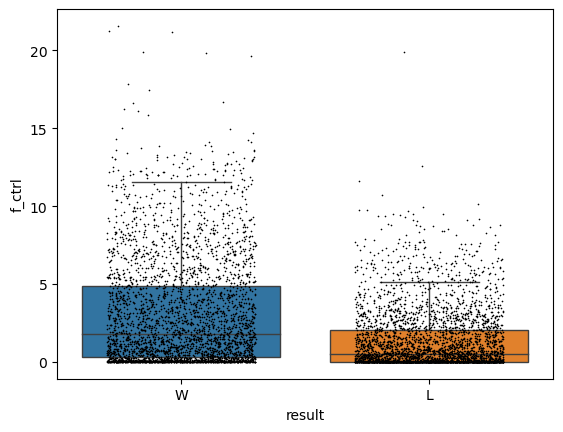

In [16]:
# Visualize STAT effect:
SELECTED_FEATURE = 'f_ctrl'
sns.boxplot(x='result',y=SELECTED_FEATURE,data=df,linewidth=1,fliersize=0)
sns.stripplot(x='result',y=SELECTED_FEATURE,data=df,size=1.2,jitter=0.3,color='black')

In [18]:
df.to_csv('data_processed.csv',index=None)
print('data_processed.csv saved.')
df.head()

data_processed.csv saved.


,date,result,fighter,opponent,title,method,fight_time,rounds,f_rev,f_ctrl,f_win_perc,f_win_streak,o_rev,o_ctrl,o_win_perc,o_win_streak,f_td%,f_sig_str%,o_td%,o_sig_str%,f_sub_att,o_sub_att,f_total_str_lnd,f_total_str_att,f_head_str_lnd,f_head_str_att,f_body_str_lnd,f_body_str_att,f_leg_str_lnd,f_leg_str_att,f_distance_str_lnd,f_distance_str_att,f_clinch_str_lnd,f_clinch_str_att,f_ground_str_lnd,f_ground_str_att,o_total_str_lnd,o_total_str_att,o_head_str_lnd,o_head_str_att,o_body_str_lnd,o_body_str_att,o_leg_str_lnd,o_leg_str_att,o_distance_str_lnd,o_distance_str_att,o_clinch_str_lnd,o_clinch_str_att,o_ground_str_lnd,o_ground_str_att
0,2023-11-04,W,Jailton Almeida,Derrick Lewis,Heavyweight Bout,Decision - Unanimous,25.00,5,1,21.17,1.0,5,0,0.95,0.67,1,0.4,0.67,0.0,0.51,4,0,120,153,32,48,5,5,1,3,5,7,3,8,30,41,28,54,17,33,3,6,0,0,2,10,1,1,17,28
1,2023-11-04,L,Don'Tale Mayes,Rodrigo Nascimento,Heavyweight Bout,Decision - Unanimous,25.00,3,0,0.65,0.5,1,0,2.35,0.75,2,0.0,0.49,0.0,0.45,0,0,105,190,39,103,30,44,10,12,55,128,24,31,0,0,91,180,51,132,9,11,10,11,58,134,12,20,0,0
2,2023-11-04,W,Caio Borralho,Abus Magomedo,Middleweight Bout,Decision - Unanimous,25.00,3,0,2.28,1.0,4,0,0.00,0.50,-1,0.0,0.49,NaN,0.35,0,0,70,126,33,73,11,15,7,15,50,102,0,0,1,1,39,110,19,74,14,24,5,9,38,107,0,0,0,0
3,2023-11-04,W,Elves Brene,Kaynan Kruschewsky,Catch Weight Bout,KO/TKO,20.02,3,0,0.05,1.0,2,0,0.00,0.00,0,NaN,0.48,NaN,0.25,0,0,16,33,6,20,2,3,8,10,16,33,0,0,0,0,8,31,6,25,2,6,0,0,8,31,0,0,0,0
4,2023-11-04,W,Vitor Petrin,Modestas Bukauskas,Light Heavyweight Bout,KO/TKO,5.05,3,0,2.30,1.0,2,0,0.00,0.50,2,0.5,0.30,NaN,0.47,0,0,14,34,6,23,2,3,0,0,7,21,0,0,1,5,12,23,5,14,0,0,4,5,9,19,0,0,0,0
